In [1]:
import pandas as pd

from kedro_sales_forecast.pipelines.train.nodes import split_data, train_model, evaluate_model
from kedro_sales_forecast.pipelines.predict.nodes import make_prediction

In [2]:
# dummy_data = pd.DataFrame(catalog.load("store_sales_weekly"))
dummy_data = pd.read_csv('../tests/data/test_data.csv', parse_dates=['ds'])
dummy_data

,unique_id,ds,y,Size,Type_A,Type_B,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,id_1,2007-09-23,0.107754,90,0,1,0,35.941204,2.406140,7.010738,4.392684
1,id_1,2007-09-30,0.473685,90,0,1,0,43.280131,2.202386,9.655562,3.992608
2,id_1,2007-10-07,0.365428,90,0,1,0,38.400777,3.493784,7.717524,4.424695
3,id_1,2007-10-14,0.126971,90,0,1,0,40.772740,2.917491,7.849567,5.304473
4,id_1,2007-10-21,0.106656,90,0,1,0,39.256674,2.230744,4.252065,8.740808
...,...,...,...,...,...,...,...,...,...,...,...
135,id_8,2009-05-17,0.177690,92,0,1,0,22.363804,2.393108,7.961581,6.360911
136,id_1,2009-05-24,0.336024,90,0,1,0,33.991867,2.652832,3.253850,3.112671
137,id_8,2009-05-24,0.021931,92,0,1,0,33.991867,2.652832,3.253850,3.112671
138,id_1,2009-05-31,0.122684,90,0,1,0,34.640794,2.564955,5.316975,3.989611


In [3]:
dummy_parameters = catalog.load("params:model_options")
dummy_parameters

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 dummy_parameters = catalog.load("params:model_options")                                      │
│   2 dummy_parameters                                                                             │
│   3                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'catalog' is not defined

In [ ]:
train_data, test_data = split_data(dummy_data, dummy_parameters)

In [5]:
model = train_model(train_data, dummy_parameters)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 116, number of used features: 19
[LightGBM] [Info] Start training from score 0.257256
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [6]:
pred, _ = evaluate_model(model, test_data, dummy_parameters)

[12/25/23 16:00:24] INFO     SMAPE of model -  RandomForestRegressor is: 41.246198666553056             ]8;id=133803;file:///home/karl/forecasting_projects/kedro-sales-forecast/src/kedro_sales_forecast/pipelines/train/nodes.py\nodes.py]8;;\:]8;id=323667;file:///home/karl/forecasting_projects/kedro-sales-forecast/src/kedro_sales_forecast/pipelines/train/nodes.py#98\98]8;;\

                    INFO     SMAPE of model -  XGBRegressor is: 41.819113887837666                      ]8;id=668721;file:///home/karl/forecasting_projects/kedro-sales-forecast/src/kedro_sales_forecast/pipelines/train/nodes.py\nodes.py]8;;\:]8;id=831715;file:///home/karl/forecasting_projects/kedro-sales-forecast/src/kedro_sales_forecast/pipelines/train/nodes.py#98\98]8;;\

                    INFO     SMAPE of model -  LGBMRegressor is: 44.91470427956856                      ]8;id=374585;file:///home/karl/forecasting_projects/kedro-sales-forecast/src/kedro_sales_forecast/pipelines/train/nodes.py\nodes.py]8;;\:]8;id=854384;file:///home/karl/forecasting_projects/kedro-sales-forecast/src/kedro_sales_forecast/pipelines/train/nodes.py#98\98]8;;\

In [7]:
metric_columns = {'RandomForestRegressor', 'XGBRegressor', 'LGBMRegressor'}
assert metric_columns.issubset(set(list(pred.columns)))

<Axes: title={'center': 'Feature Importance XGBRegressor'}>

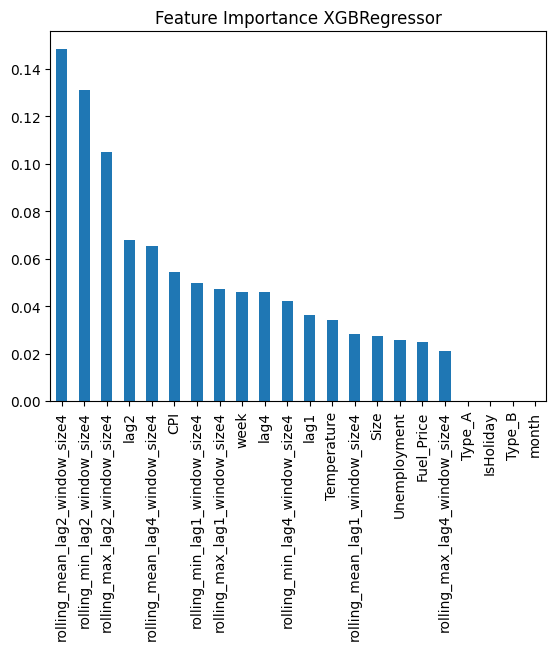

In [8]:
pd.Series(model.models_['XGBRegressor'].feature_importances_, index=model.ts.features_order_).sort_values(ascending=False).plot.bar(title='Feature Importance XGBRegressor')